In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("train.csv")



In [6]:
df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [7]:
# Keep only needed columns
cols = ["Attrition", "Work-Life Balance", "Job Satisfaction", "Monthly Income"]
df = df[cols].copy()


In [8]:
df.head()

,Attrition,Work-Life Balance,Job Satisfaction,Monthly Income
0,Stayed,Excellent,Medium,5390
1,Stayed,Poor,High,5534
2,Stayed,Good,High,8159
3,Stayed,Good,High,3989
4,Stayed,Fair,Very High,4821


In [15]:
#Clean numeric columns

# Convert Attrition to binary: 1 = Left, 0 = Stayed
df["Attrition_flag"] = df["Attrition"].map({"Left": 1, "Stayed": 0})

# Remove currency symbols then convert to numeric
df["Monthly Income"] = (
    df["Monthly Income"].astype(str).str.replace(r"[^0-9.\-]", "", regex=True)
)
df["Monthly Income"] = pd.to_numeric(df["Monthly Income"], errors="coerce")

# 2) Coerce ordinal text to numbers if needed
wlb_map = {"Poor": 1, "Fair": 2, "Good": 3, "Excellent": 4}
js_map  = {"Very Low": 1, "Low": 2, "Medium": 3, "High": 4, "Very High": 5}

if df["Work-Life Balance"].dtype == "object":
    df["Work-Life Balance"] = df["Work-Life Balance"].replace(wlb_map)
    df["Work-Life Balance"] = pd.to_numeric(df["Work-Life Balance"], errors="coerce")

if df["Job Satisfaction"].dtype == "object":
    df["Job Satisfaction"] = df["Job Satisfaction"].replace(js_map)
    df["Job Satisfaction"] = pd.to_numeric(df["Job Satisfaction"], errors="coerce")


In [16]:
 #sanity check
print(df.dtypes[["Work-Life Balance", "Job Satisfaction", "Monthly Income"]])


Work-Life Balance    int64
Job Satisfaction     int64
Monthly Income       int64
dtype: object


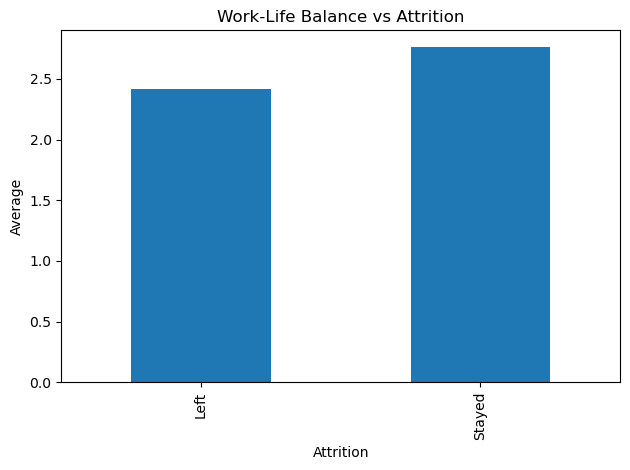

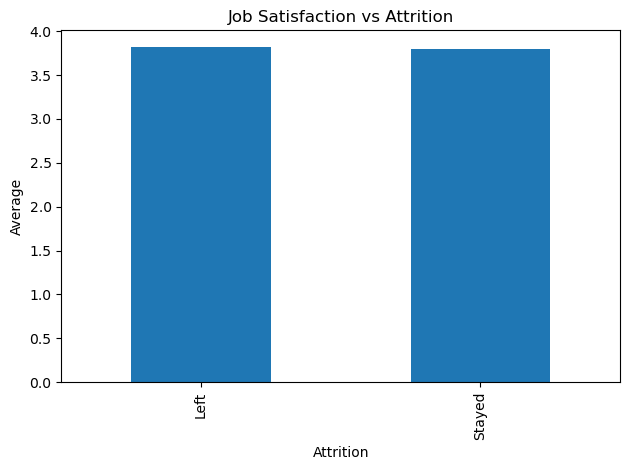

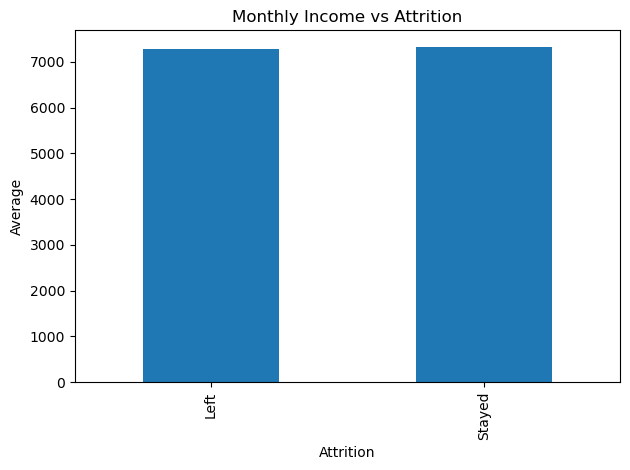

In [17]:
#Plot simple bar charts (mean by Attrition)
for col in ["Work-Life Balance", "Job Satisfaction", "Monthly Income"]:
    plt.figure()
    df.groupby("Attrition")[col].mean().plot(kind="bar", title=f"{col} vs Attrition")
    plt.ylabel("Average")
    plt.xlabel("Attrition")
    plt.tight_layout()
    plt.show()


__________________________________
Analyze Overtime vs Attrition
__________________________________

In [18]:

df = pd.read_csv("train.csv")
df.columns = df.columns.str.strip()

# Check what values exist in the "Overtime" column
print("\nUnique values in Overtime column:")
print(df["Overtime"].unique())





Unique values in Overtime column:
['No' 'Yes']


In [19]:
# Create a crosstab showing percentage of attrition by overtime status
ct = pd.crosstab(df["Overtime"], df["Attrition"], normalize="index") * 100

print("\nPercentage of Attrition by Overtime status:")
print(ct.round(2))




Percentage of Attrition by Overtime status:
Attrition   Left  Stayed
Overtime                
No         45.61   54.39
Yes        51.54   48.46


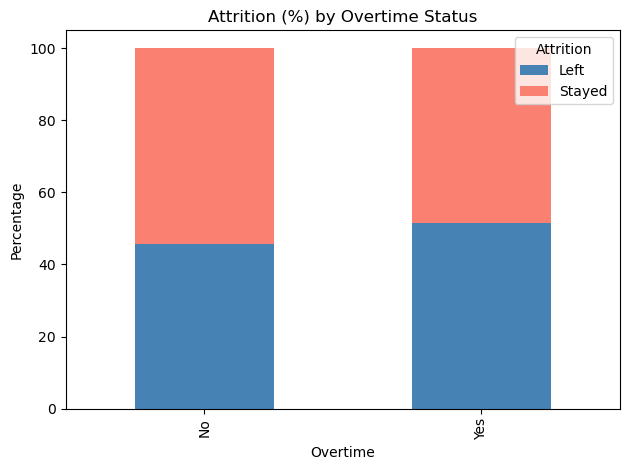

In [20]:
#simple stacked bar chart
ct.plot(kind="bar", stacked=True, color=["steelblue", "salmon"])
plt.title("Attrition (%) by Overtime Status")
plt.ylabel("Percentage")
plt.xlabel("Overtime")
plt.legend(title="Attrition", loc="upper right")
plt.tight_layout()
plt.show()

______________________________________________
Analyze Leadership Opportunities vs Attrition
_____________________________________________

In [21]:
df = pd.read_csv("train.csv")
df.columns = df.columns.str.strip()

# Check unique values in the column
print("\nUnique values in Leadership Opportunities column:")
print(df["Leadership Opportunities"].unique())




Unique values in Leadership Opportunities column:
['No' 'Yes']


In [22]:
# Create a crosstab with percentages
ct = pd.crosstab(df["Leadership Opportunities"], df["Attrition"], normalize="index") * 100

print("\nPercentage of Attrition by Leadership Opportunities:")
print(ct.round(2))





Percentage of Attrition by Leadership Opportunities:
Attrition                  Left  Stayed
Leadership Opportunities               
No                        47.66   52.34
Yes                       45.31   54.69


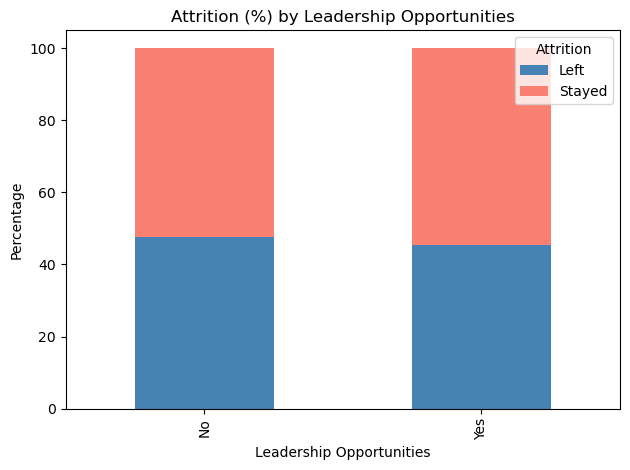

In [23]:
# Plot the result
ct.plot(kind="bar", stacked=True, color=["steelblue", "salmon"])
plt.title("Attrition (%) by Leadership Opportunities")
plt.ylabel("Percentage")
plt.xlabel("Leadership Opportunities")
plt.legend(title="Attrition", loc="upper right")
plt.tight_layout()
plt.show()

__________________________________
Analyze Employee Recognition vs Attrition
__________________________________

In [24]:
df = pd.read_csv("train.csv")
df.columns = df.columns.str.strip()

# Check unique values
print("\nUnique values in Employee Recognition column:")
print(df["Employee Recognition"].unique())





Unique values in Employee Recognition column:
['Medium' 'Low' 'High' 'Very High']



Percentage of Attrition by Employee Recognition:
Attrition              Left  Stayed
Employee Recognition               
High                  47.18   52.82
Low                   47.83   52.17
Medium                47.71   52.29
Very High             46.14   53.86


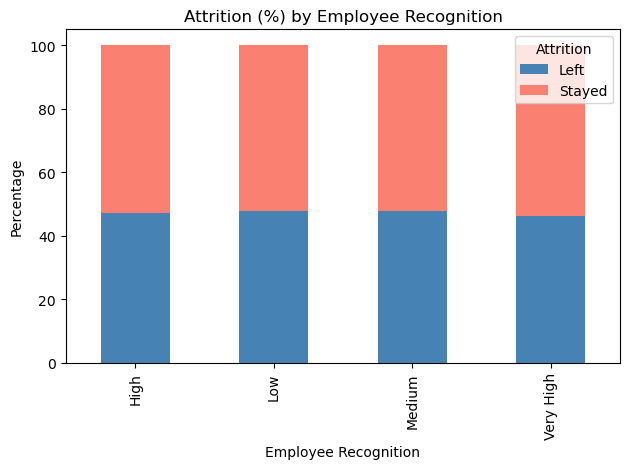

In [25]:
# Create a crosstab with percentages
ct = pd.crosstab(df["Employee Recognition"], df["Attrition"], normalize="index") * 100

print("\nPercentage of Attrition by Employee Recognition:")
print(ct.round(2))

# Plot the result
ct.plot(kind="bar", stacked=True, color=["steelblue", "salmon"])
plt.title("Attrition (%) by Employee Recognition")
plt.ylabel("Percentage")
plt.xlabel("Employee Recognition")
plt.legend(title="Attrition", loc="upper right")
plt.tight_layout()
plt.show()

__________________________________
Analyze Innovation Opportunities vs Attrition
__________________________________

In [27]:

df = pd.read_csv("train.csv")
df.columns = df.columns.str.strip()

# Check unique values
print("\nUnique values in Innovation Opportunities column:")
print(df["Innovation Opportunities"].unique())




Unique values in Innovation Opportunities column:
['No' 'Yes']



Percentage of Attrition by Innovation Opportunities:
Attrition                  Left  Stayed
Innovation Opportunities               
No                        48.02   51.98
Yes                       45.11   54.89


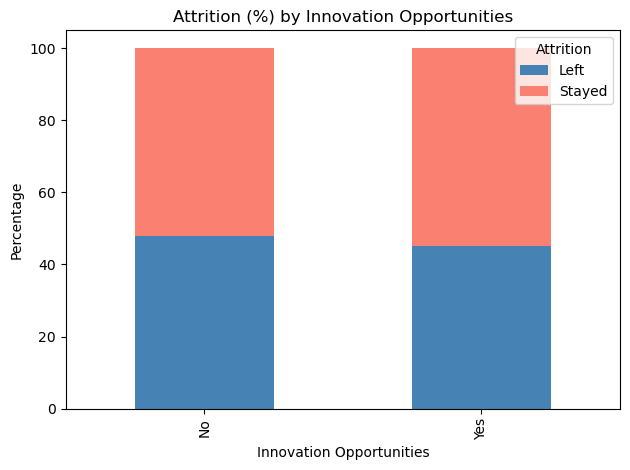

In [28]:
# Create a crosstab with percentages
ct = pd.crosstab(df["Innovation Opportunities"], df["Attrition"], normalize="index") * 100

print("\nPercentage of Attrition by Innovation Opportunities:")
print(ct.round(2))

# Plot results
ct.plot(kind="bar", stacked=True, color=["steelblue", "salmon"])
plt.title("Attrition (%) by Innovation Opportunities")
plt.ylabel("Percentage")
plt.xlabel("Innovation Opportunities")
plt.legend(title="Attrition", loc="upper right")
plt.tight_layout()
plt.show()


__________________________________
Analyze Company Reputation vs Attrition
__________________________________

In [29]:
df = pd.read_csv("train.csv")
df.columns = df.columns.str.strip()

# Check unique values
print("\nUnique values in Company Reputation column:")
print(df["Company Reputation"].unique())





Unique values in Company Reputation column:
['Excellent' 'Fair' 'Poor' 'Good']



Percentage of Attrition by Company Reputation:
Attrition            Left  Stayed
Company Reputation               
Excellent           43.92   56.08
Fair                51.94   48.06
Good                42.91   57.09
Poor                56.50   43.50


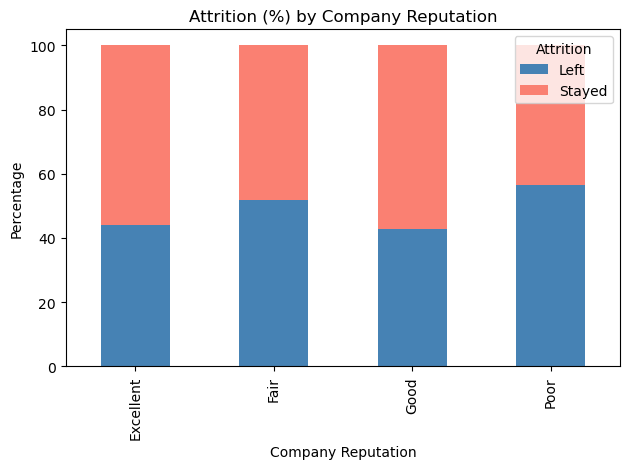

In [30]:
# Create a crosstab with percentages
ct = pd.crosstab(df["Company Reputation"], df["Attrition"], normalize="index") * 100

print("\nPercentage of Attrition by Company Reputation:")
print(ct.round(2))

# Plot
ct.plot(kind="bar", stacked=True, color=["steelblue", "salmon"])
plt.title("Attrition (%) by Company Reputation")
plt.ylabel("Percentage")
plt.xlabel("Company Reputation")
plt.legend(title="Attrition", loc="upper right")
plt.tight_layout()
plt.show()

__________________________________
Analyze Job Role vs Attrition
__________________________________


Unique values in Job Role column:
['Education' 'Media' 'Healthcare' 'Technology' 'Finance']

Percentage of Attrition by Job Role:
Attrition    Left  Stayed
Job Role                 
Education   48.72   51.28
Finance     46.80   53.20
Healthcare  47.31   52.69
Media       47.44   52.56
Technology  47.29   52.71


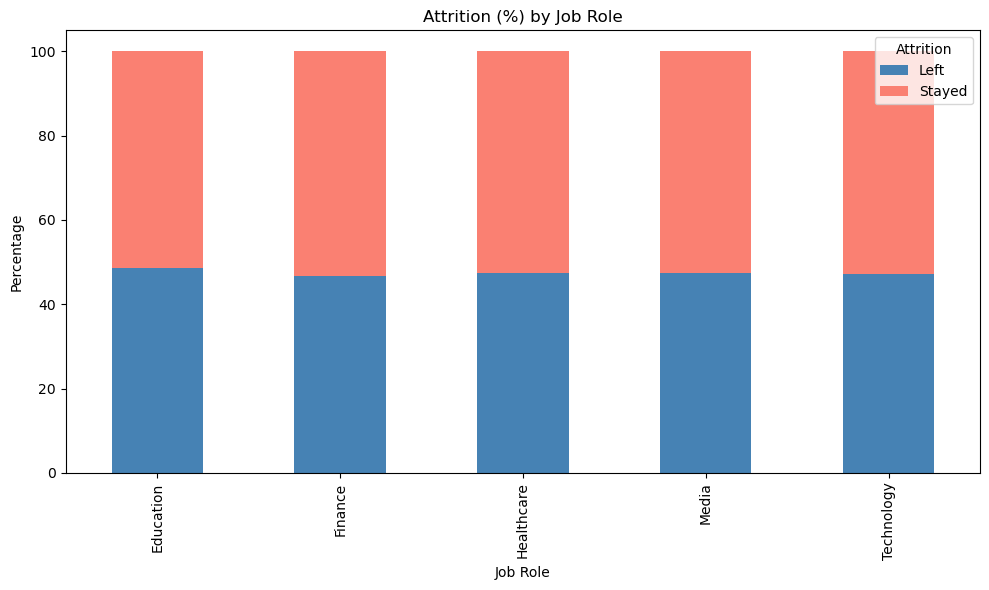

In [31]:

df = pd.read_csv("train.csv")
df.columns = df.columns.str.strip()

# Check unique values
print("\nUnique values in Job Role column:")
print(df["Job Role"].unique())

# Create a crosstab with percentages
ct = pd.crosstab(df["Job Role"], df["Attrition"], normalize="index") * 100

print("\nPercentage of Attrition by Job Role:")
print(ct.round(2))

# Plot
ct.plot(kind="bar", stacked=True, figsize=(10, 6), color=["steelblue", "salmon"])
plt.title("Attrition (%) by Job Role")
plt.ylabel("Percentage")
plt.xlabel("Job Role")
plt.legend(title="Attrition", loc="upper right")
plt.tight_layout()
plt.show()


__________________________________
Analyze Performance Rating vs Attrition
__________________________________


Unique values in Performance Rating column:
['Average' 'Low' 'High' 'Below Average']

Percentage of Attrition by Performance Rating:
Attrition            Left  Stayed
Performance Rating               
Average             46.15   53.85
Below Average       51.81   48.19
High                46.07   53.93
Low                 57.53   42.47


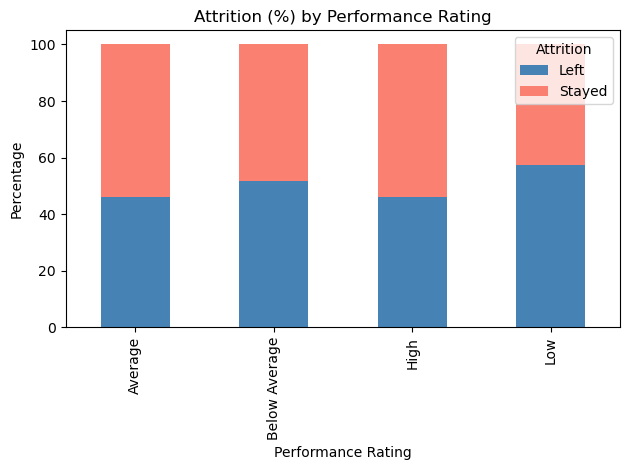

In [33]:

df = pd.read_csv("train.csv")
df.columns = df.columns.str.strip()

# Check unique values
print("\nUnique values in Performance Rating column:")
print(df["Performance Rating"].unique())

# Create a crosstab with percentages
ct = pd.crosstab(df["Performance Rating"], df["Attrition"], normalize="index") * 100

print("\nPercentage of Attrition by Performance Rating:")
print(ct.round(2))

# Plot
ct.plot(kind="bar", stacked=True, color=["steelblue", "salmon"])
plt.title("Attrition (%) by Performance Rating")
plt.ylabel("Percentage")
plt.xlabel("Performance Rating")
plt.legend(title="Attrition", loc="upper right")
plt.tight_layout()
plt.show()


__________________________________
Analyze Education Level vs Attrition
__________________________________


Unique values in Education Level column:
['Associate Degree' 'Master’s Degree' 'Bachelor’s Degree' 'High School'
 'PhD']

Percentage of Attrition by Education Level:
Attrition           Left  Stayed
Education Level                 
Associate Degree   48.47   51.53
Bachelor’s Degree  49.32   50.68
High School        48.25   51.75
Master’s Degree    48.93   51.07
PhD                24.86   75.14


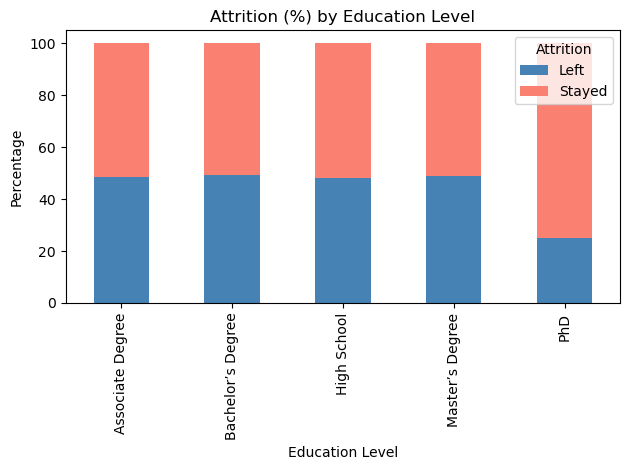

In [35]:
df = pd.read_csv("train.csv")
df.columns = df.columns.str.strip()

# Check unique values
print("\nUnique values in Education Level column:")
print(df["Education Level"].unique())

# Create a crosstab with percentages
ct = pd.crosstab(df["Education Level"], df["Attrition"], normalize="index") * 100

print("\nPercentage of Attrition by Education Level:")
print(ct.round(2))

# Plot
ct.plot(kind="bar", stacked=True, color=["steelblue", "salmon"])
plt.title("Attrition (%) by Education Level")
plt.ylabel("Percentage")
plt.xlabel("Education Level")
plt.legend(title="Attrition", loc="upper right")
plt.tight_layout()
plt.show()


__________________________________
Analyze Marital Status vs Attrition
__________________________________


Unique values in Marital Status column:
['Married' 'Divorced' 'Single']

Percentage of Attrition by Marital Status:
Attrition        Left  Stayed
Marital Status               
Divorced        40.70   59.30
Married         36.15   63.85
Single          66.83   33.17


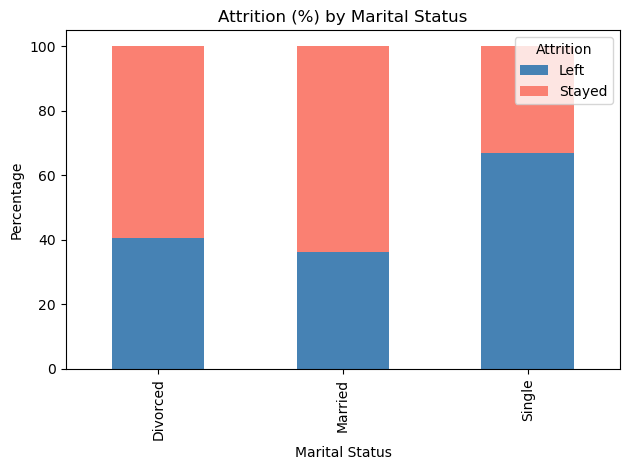

In [36]:

df = pd.read_csv("train.csv")
df.columns = df.columns.str.strip()

# Check unique values
print("\nUnique values in Marital Status column:")
print(df["Marital Status"].unique())

# Create a crosstab with percentages
ct = pd.crosstab(df["Marital Status"], df["Attrition"], normalize="index") * 100

print("\nPercentage of Attrition by Marital Status:")
print(ct.round(2))

# Plot
ct.plot(kind="bar", stacked=True, color=["steelblue", "salmon"])
plt.title("Attrition (%) by Marital Status")
plt.ylabel("Percentage")
plt.xlabel("Marital Status")
plt.legend(title="Attrition", loc="upper right")
plt.tight_layout()
plt.show()


__________________________________
Analyze Remote Work vs Attrition
__________________________________


Unique values in Remote Work column:
['No' 'Yes']

Percentage of Attrition by Remote Work:
Attrition     Left  Stayed
Remote Work               
No           52.89   47.11
Yes          24.86   75.14


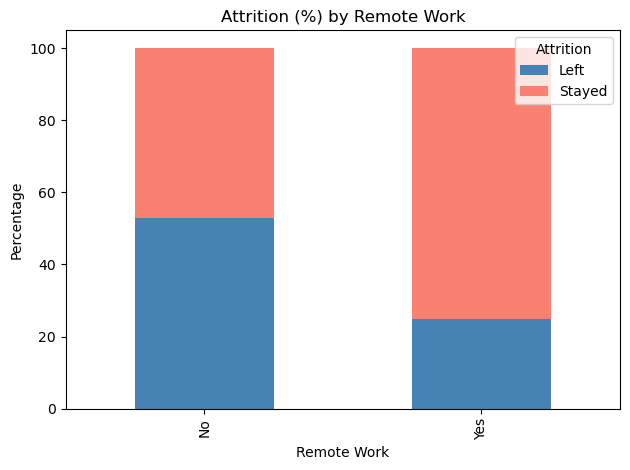

In [37]:
df = pd.read_csv("train.csv")
df.columns = df.columns.str.strip()

# Check unique values
print("\nUnique values in Remote Work column:")
print(df["Remote Work"].unique())

# Create a crosstab with percentages
ct = pd.crosstab(df["Remote Work"], df["Attrition"], normalize="index") * 100

print("\nPercentage of Attrition by Remote Work:")
print(ct.round(2))

# Plot
ct.plot(kind="bar", stacked=True, color=["steelblue", "salmon"])
plt.title("Attrition (%) by Remote Work")
plt.ylabel("Percentage")
plt.xlabel("Remote Work")
plt.legend(title="Attrition", loc="upper right")
plt.tight_layout()
plt.show()


__________________________________
Analyze Age vs Attrition
__________________________________


Percentage of Attrition by Age Group:
Attrition   Left  Stayed
Age Group               
18-25      53.24   46.76
26-35      47.86   52.14
36-45      45.09   54.91
46-55      46.23   53.77
56-65      45.09   54.91


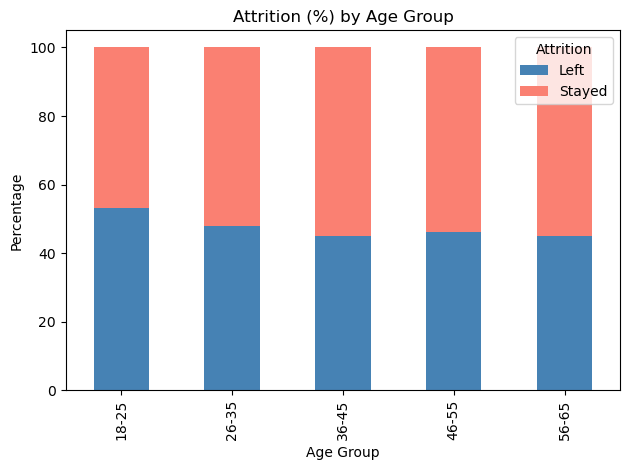

In [38]:

df = pd.read_csv("train.csv")
df.columns = df.columns.str.strip()

# Create age groups for easier comparison
bins = [18, 25, 35, 45, 55, 65]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)

# Create crosstab with percentages
ct = pd.crosstab(df['Age Group'], df['Attrition'], normalize='index') * 100

print("\nPercentage of Attrition by Age Group:")
print(ct.round(2))

# Plot
ct.plot(kind='bar', stacked=True, color=["steelblue", "salmon"])
plt.title("Attrition (%) by Age Group")
plt.ylabel("Percentage")
plt.xlabel("Age Group")
plt.legend(title="Attrition", loc="upper right")
plt.tight_layout()
plt.show()


__________________________________
Analyze Years at Company vs Attrition
__________________________________


Percentage of Attrition by Years at Company:
Attrition     Left  Stayed
Years Group               
0-2          53.24   46.76
3-5          53.17   46.83
6-10         51.57   48.43
11-20        44.73   55.27
21-40        43.85   56.15


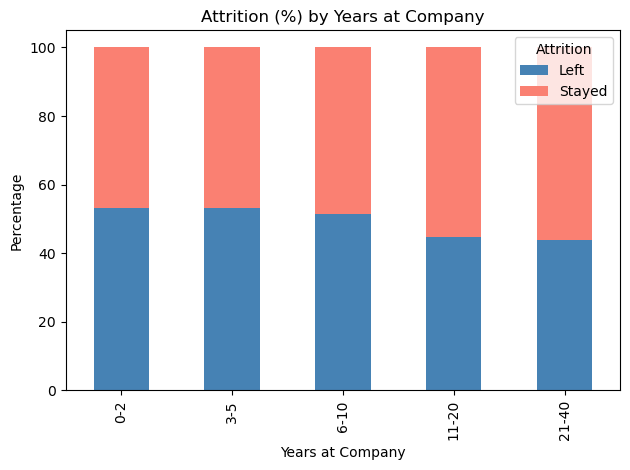

In [39]:

df = pd.read_csv("train.csv")
df.columns = df.columns.str.strip()

# Create service length groups
bins = [0, 2, 5, 10, 20, 40]
labels = ['0-2', '3-5', '6-10', '11-20', '21-40']
df['Years Group'] = pd.cut(df['Years at Company'], bins=bins, labels=labels, include_lowest=True)

# Create crosstab with percentages
ct = pd.crosstab(df['Years Group'], df['Attrition'], normalize='index') * 100

print("\nPercentage of Attrition by Years at Company:")
print(ct.round(2))

# Plot
ct.plot(kind='bar', stacked=True, color=["steelblue", "salmon"])
plt.title("Attrition (%) by Years at Company")
plt.ylabel("Percentage")
plt.xlabel("Years at Company")
plt.legend(title="Attrition", loc="upper right")
plt.tight_layout()
plt.show()


__________________________________
Analyze Job Level vs Attrition
__________________________________


Unique values in Job Level column:
['Mid' 'Senior' 'Entry']

Percentage of Attrition by Job Level:
Attrition   Left  Stayed
Job Level               
Entry      63.19   36.81
Mid        45.56   54.44
Senior     20.31   79.69


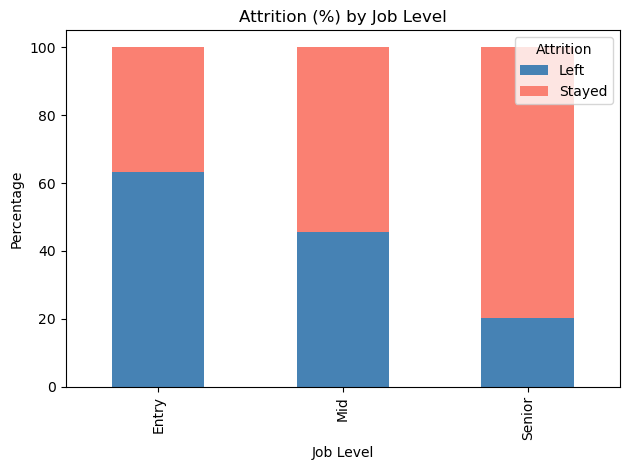

In [40]:
df = pd.read_csv("train.csv")
df.columns = df.columns.str.strip()

# Check unique values
print("\nUnique values in Job Level column:")
print(df["Job Level"].unique())

# Create crosstab with percentages
ct = pd.crosstab(df["Job Level"], df["Attrition"], normalize="index") * 100

print("\nPercentage of Attrition by Job Level:")
print(ct.round(2))

# Plot
ct.plot(kind="bar", stacked=True, color=["steelblue", "salmon"])
plt.title("Attrition (%) by Job Level")
plt.ylabel("Percentage")
plt.xlabel("Job Level")
plt.legend(title="Attrition", loc="upper right")
plt.tight_layout()
plt.show()


__________________________________
Analyze Distance from Home vs Attrition
__________________________________


Percentage of Attrition by Distance from Home:
Attrition        Left  Stayed
Distance Group               
0-5 km          42.19   57.81
6-10 km         41.70   58.30
11-20 km        41.53   58.47
21-40 km        41.96   58.04
41-80 km        50.51   49.49


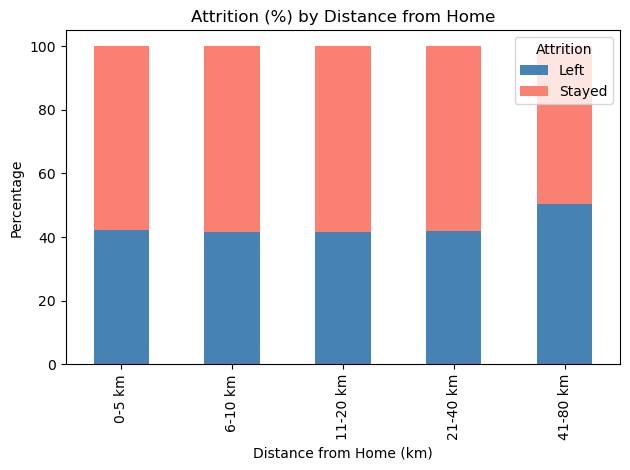

In [41]:

df = pd.read_csv("train.csv")
df.columns = df.columns.str.strip()

# Create distance groups
bins = [0, 5, 10, 20, 40, 80]
labels = ['0-5 km', '6-10 km', '11-20 km', '21-40 km', '41-80 km']
df['Distance Group'] = pd.cut(df['Distance from Home'], bins=bins, labels=labels, include_lowest=True)

# Create crosstab with percentages
ct = pd.crosstab(df['Distance Group'], df['Attrition'], normalize='index') * 100

print("\nPercentage of Attrition by Distance from Home:")
print(ct.round(2))

# Plot
ct.plot(kind='bar', stacked=True, color=["steelblue", "salmon"])
plt.title("Attrition (%) by Distance from Home")
plt.ylabel("Percentage")
plt.xlabel("Distance from Home (km)")
plt.legend(title="Attrition", loc="upper right")
plt.tight_layout()
plt.show()


__________________________________
Analyze Number of Promotions vs Attrition
__________________________________


Percentage of Attrition by Number of Promotions:
Attrition         Left  Stayed
Promotion Group               
0                49.33   50.67
1                49.02   50.98
2-3              43.63   56.37
4-6              22.84   77.16


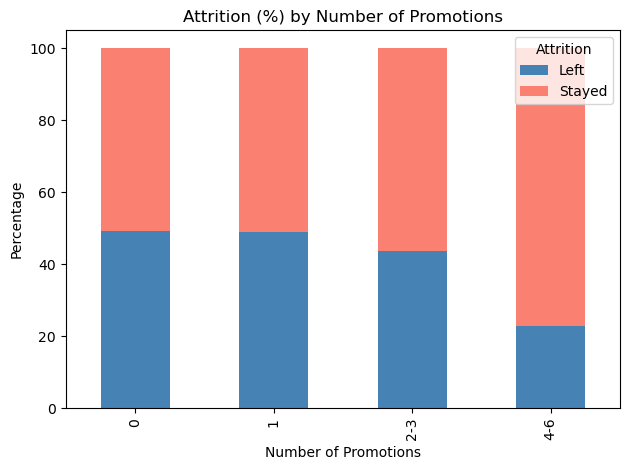

In [42]:

df = pd.read_csv("train.csv")
df.columns = df.columns.str.strip()

# Create groups for number of promotions
bins = [-1, 0, 1, 3, 6, 10]
labels = ['0', '1', '2-3', '4-6', '7-10']
df['Promotion Group'] = pd.cut(df['Number of Promotions'], bins=bins, labels=labels, include_lowest=True)

# Create crosstab with percentages
ct = pd.crosstab(df['Promotion Group'], df['Attrition'], normalize='index') * 100

print("\nPercentage of Attrition by Number of Promotions:")
print(ct.round(2))

# Plot
ct.plot(kind='bar', stacked=True, color=["steelblue", "salmon"])
plt.title("Attrition (%) by Number of Promotions")
plt.ylabel("Percentage")
plt.xlabel("Number of Promotions")
plt.legend(title="Attrition", loc="upper right")
plt.tight_layout()
plt.show()


__________________________________
Analyze Company Tenure vs Attrition
__________________________________


Percentage of Attrition by Company Tenure:
Attrition      Left  Stayed
Tenure Group               
0-2           41.67   58.33
3-5           56.79   43.21
6-10          53.39   46.61
11-20         50.76   49.24
21-40         47.85   52.15


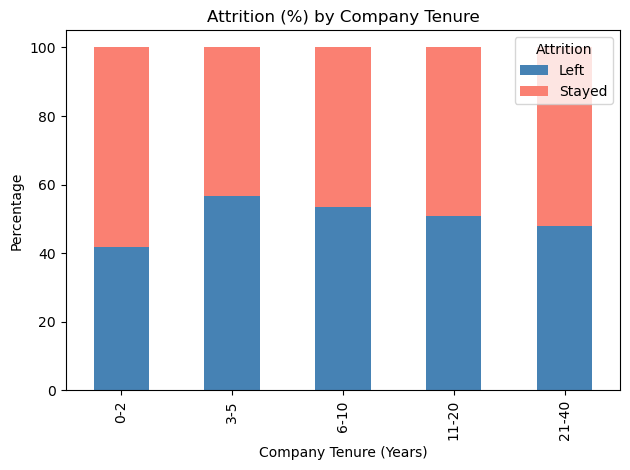

In [43]:

df = pd.read_csv("train.csv")
df.columns = df.columns.str.strip()

# Create groups for company tenure
bins = [0, 2, 5, 10, 20, 40]
labels = ['0-2', '3-5', '6-10', '11-20', '21-40']
df['Tenure Group'] = pd.cut(df['Company Tenure'], bins=bins, labels=labels, include_lowest=True)

# Create crosstab with percentages
ct = pd.crosstab(df['Tenure Group'], df['Attrition'], normalize='index') * 100

print("\nPercentage of Attrition by Company Tenure:")
print(ct.round(2))

# Plot
ct.plot(kind='bar', stacked=True, color=["steelblue", "salmon"])
plt.title("Attrition (%) by Company Tenure")
plt.ylabel("Percentage")
plt.xlabel("Company Tenure (Years)")
plt.legend(title="Attrition", loc="upper right")
plt.tight_layout()
plt.show()


__________________________________
Analyze Number of Dependents vs Attrition
__________________________________


Percentage of Attrition by Number of Dependents:
Attrition          Left  Stayed
Dependents Group               
0                 49.75   50.25
1                 49.50   50.50
2                 50.07   49.93
3                 50.39   49.61
4-5               34.76   65.24
6-10              36.71   63.29


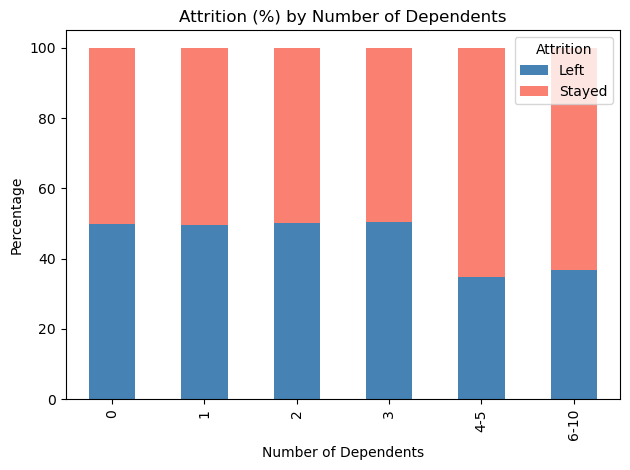

In [44]:

df = pd.read_csv("train.csv")
df.columns = df.columns.str.strip()

# Create dependent groups
bins = [-1, 0, 1, 2, 3, 5, 10]
labels = ['0', '1', '2', '3', '4-5', '6-10']
df['Dependents Group'] = pd.cut(df['Number of Dependents'], bins=bins, labels=labels, include_lowest=True)

# Create crosstab with percentages
ct = pd.crosstab(df['Dependents Group'], df['Attrition'], normalize='index') * 100

print("\nPercentage of Attrition by Number of Dependents:")
print(ct.round(2))

# Plot
ct.plot(kind='bar', stacked=True, color=["steelblue", "salmon"])
plt.title("Attrition (%) by Number of Dependents")
plt.ylabel("Percentage")
plt.xlabel("Number of Dependents")
plt.legend(title="Attrition", loc="upper right")
plt.tight_layout()
plt.show()


__________________________________
Analyze Gender vs Attrition
__________________________________


Unique values in Gender column:
['Male' 'Female']

Percentage of Attrition by Gender:
Attrition   Left  Stayed
Gender                  
Female     53.16   46.84
Male       42.94   57.06


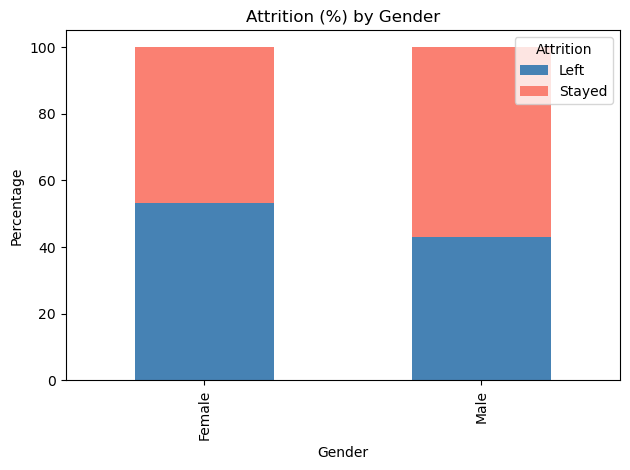

In [45]:

df = pd.read_csv("train.csv")
df.columns = df.columns.str.strip()

# Check unique values
print("\nUnique values in Gender column:")
print(df["Gender"].unique())

# Create crosstab with percentages
ct = pd.crosstab(df["Gender"], df["Attrition"], normalize="index") * 100

print("\nPercentage of Attrition by Gender:")
print(ct.round(2))

# Plot
ct.plot(kind="bar", stacked=True, color=["steelblue", "salmon"])
plt.title("Attrition (%) by Gender")
plt.ylabel("Percentage")
plt.xlabel("Gender")
plt.legend(title="Attrition", loc="upper right")
plt.tight_layout()
plt.show()


__________________________________
Analyze Company Size vs Attrition
__________________________________


Unique values in Company Size column:
['Medium' 'Small' 'Large']

Percentage of Attrition by Company Size:
Attrition      Left  Stayed
Company Size               
Large         46.47   53.53
Medium        46.58   53.42
Small         49.87   50.13


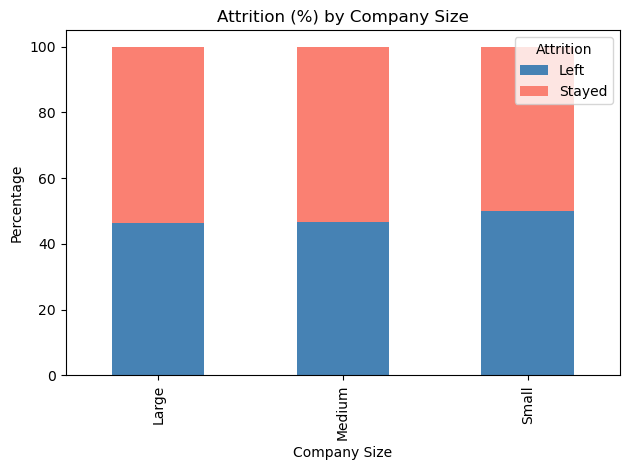

In [46]:

df = pd.read_csv("train.csv")
df.columns = df.columns.str.strip()

# Check unique values
print("\nUnique values in Company Size column:")
print(df["Company Size"].unique())

# Create crosstab with percentages
ct = pd.crosstab(df["Company Size"], df["Attrition"], normalize="index") * 100

print("\nPercentage of Attrition by Company Size:")
print(ct.round(2))

# Plot
ct.plot(kind="bar", stacked=True, color=["steelblue", "salmon"])
plt.title("Attrition (%) by Company Size")
plt.ylabel("Percentage")
plt.xlabel("Company Size")
plt.legend(title="Attrition", loc="upper right")
plt.tight_layout()
plt.show()
